In [246]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
# Import the data set
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

In [248]:
# look at the data
train.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/01/2020 05:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/01/2020 05:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/01/2020 01:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,192.168.3.130-200.175.2.130-8180-35921-6,200.175.2.130,35921,192.168.3.130,8180,6,10/01/2020 01:39,4047,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,192.168.3.130-200.175.2.130-8180-43053-6,200.175.2.130,43053,192.168.3.130,8180,6,10/01/2020 01:39,3819,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [249]:
# Data size of the train data
train.shape

(143574, 84)

In [250]:
# Data size of the test data
test.shape

(61592, 84)

In [251]:
# Check for mising values in train data
train.isnull().sum()

Flow_ID      0
Src_IP       0
Src_Port     0
Dst_IP       0
Dst_Port     0
            ..
Idle_Mean    0
Idle_Std     0
Idle_Max     0
Idle_Min     0
Label        0
Length: 84, dtype: int64

In [252]:
# Check for mising values in train data greater than 0
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [253]:
# Check for mising values in test data greater than 0
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

In [254]:
# Feature cardinality(unique values)
train.nunique()

Flow_ID      102960
Src_IP        52363
Src_Port      24229
Dst_IP         1014
Dst_Port      23957
              ...  
Idle_Mean      4053
Idle_Std       5471
Idle_Max       2908
Idle_Min       5080
Label             6
Length: 84, dtype: int64

In [255]:
# Data description
train.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,143574.000000,143574.000000,143574.000000,1.435740e+05,143574.000000,143574.000000,1.435740e+05,1.435740e+05,143574.000000,143574.000000,...,143574.000000,143574.0,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05
mean,17499.654046,10778.129327,5.666806,1.014942e+07,4.630636,8.529790,1.137087e+03,1.461854e+04,147.555734,7.437558,...,1.497848,0.0,7.209253e+04,5.082656e+04,1.454295e+05,3.611374e+04,6.978304e+06,2.118306e+05,7.173034e+06,6.791966e+06
std,22467.153441,18305.497287,5.727448,2.618417e+07,69.004375,153.640664,6.791834e+04,5.026526e+05,856.733699,40.343082,...,25.624422,0.0,8.175082e+05,6.682283e+05,1.462056e+06,6.128490e+05,1.890190e+07,2.055652e+06,1.920783e+07,1.876914e+07
min,0.000000,0.000000,0.000000,-1.530000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,2.000000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,53.000000,6.000000,2.952000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,40657.750000,9659.750000,6.000000,2.730550e+04,3.000000,4.000000,3.100000e+01,1.370000e+02,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,60998.000000,17.000000,1.200000e+08,16928.000000,34094.000000,1.500000e+07,1.070000e+08,64239.000000,3900.000000,...,5280.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.200000e+08,7.300000e+07,1.200000e+08,1.200000e+08


In [256]:
test.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,61592.000000,61592.000000,61592.000000,6.159200e+04,61592.000000,61592.000000,6.159200e+04,6.159200e+04,61592.000000,61592.000000,...,61592.000000,61592.0,6.159200e+04,6.159200e+04,6.159200e+04,6.159200e+04,6.159200e+04,6.159200e+04,6.159200e+04,6.159200e+04
mean,17550.621558,10806.721165,5.683774,1.011583e+07,4.380569,7.635407,1.095427e+03,1.180183e+04,146.983293,7.437102,...,1.493424,0.0,7.522545e+04,5.133549e+04,1.494836e+05,3.822414e+04,6.822011e+06,2.078817e+05,7.016859e+06,6.637904e+06
std,22469.543235,18282.048642,5.721259,2.630000e+07,55.749087,83.713081,1.277707e+05,2.599172e+05,822.076883,39.940000,...,45.828486,0.0,8.187324e+05,5.985302e+05,1.436877e+06,6.335482e+05,1.865425e+07,2.032431e+06,1.896193e+07,1.852422e+07
min,0.000000,0.000000,0.000000,-1.540000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,2.000000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,53.000000,6.000000,2.971000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,40681.750000,9897.250000,6.000000,2.761900e+04,3.000000,4.000000,3.100000e+01,1.370000e+02,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65458.000000,60996.000000,17.000000,1.200000e+08,11264.000000,11218.000000,3.160000e+07,2.000000e+07,60339.000000,3900.000000,...,11180.000000,0.0,8.020000e+07,5.870000e+07,8.680000e+07,8.020000e+07,1.200000e+08,4.030000e+07,1.200000e+08,1.200000e+08


In [257]:
# Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143574 entries, 0 to 143573
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            143574 non-null  object 
 1   Src_IP             143574 non-null  object 
 2   Src_Port           143574 non-null  int64  
 3   Dst_IP             143574 non-null  object 
 4   Dst_Port           143574 non-null  int64  
 5   Protocol           143574 non-null  int64  
 6   Timestamp          143574 non-null  object 
 7   Flow_Duration      143574 non-null  int64  
 8   Tot_Fwd_Pkts       143574 non-null  int64  
 9   Tot_Bwd_Pkts       143574 non-null  int64  
 10  TotLen_Fwd_Pkts    143574 non-null  int64  
 11  TotLen_Bwd_Pkts    143574 non-null  int64  
 12  Fwd_Pkt_Len_Max    143574 non-null  int64  
 13  Fwd_Pkt_Len_Min    143574 non-null  int64  
 14  Fwd_Pkt_Len_Mean   143574 non-null  float64
 15  Fwd_Pkt_Len_Std    143574 non-null  float64
 16  Bw

In [258]:
# filter out the non-numerical features(except the labels)
train_labels=train["Label"]
test_labels=test["Label"]
train=train.select_dtypes(exclude=["object"])
test=test.select_dtypes(exclude=["object"])


In [259]:
train.head(5)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,38693,4444,6,268599,2,3,0,23,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
1,33747,3632,6,22194,5,5,53,30,30,0,...,2,0,0.0,0.0,0,0,0.0,0.0,0,0
2,37217,8180,6,8782,4,4,30,30,30,0,...,1,0,0.0,0.0,0,0,0.0,0.0,0,0
3,35921,8180,6,4047,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
4,43053,8180,6,3819,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0


In [260]:
# Outliers Detection
from sklearn.neighbors import LocalOutlierFactor
outlier_detector=LocalOutlierFactor(novelty=True)


In [261]:
# fit outlier detector on the train data
outlier_detector.fit(train)

LocalOutlierFactor(novelty=True)

In [262]:
train_outliers=outlier_detector.predict(train)
test_outliers=outlier_detector.predict(test)


C:\Users\ADMN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\ADMN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [263]:
# Number of outliers in train data
print("Number of outliers in train split:",sum(train_outliers==-1))

Number of outliers in train split: 4136


In [264]:
# Number of outliers in test data
print("Number of outliers in test split:",sum(test_outliers==-1))

Number of outliers in test split: 2006


In [265]:
# check and get lid of Duplicate Values
train=train.loc[~train.duplicated(),:]
test=test.loc[~test.duplicated(),:]

In [266]:
# Check the new data shape
train.shape

(93217, 79)

In [267]:
test.shape

(40402, 79)

In [268]:
# Features with a cardinality of 1(invariant features)
train.nunique()[train.nunique()==1]

Fwd_PSH_Flags        1
Fwd_URG_Flags        1
Bwd_URG_Flags        1
URG_Flag_Cnt         1
CWE_Flag_Count       1
ECE_Flag_Cnt         1
Fwd_Byts/b_Avg       1
Fwd_Pkts/b_Avg       1
Fwd_Blk_Rate_Avg     1
Bwd_Byts/b_Avg       1
Bwd_Pkts/b_Avg       1
Bwd_Blk_Rate_Avg     1
Init_Fwd_Win_Byts    1
Fwd_Seg_Size_Min     1
dtype: int64

In [269]:
# convert the invariant features into a list and store them in a variable invarint features.
invariant_features=train.nunique()[train.nunique()==1].index.tolist()

In [270]:
invariant_features

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min']

In [271]:
# check label distribution
train_labels.value_counts()

Label
DDoS      51588
Normal    47862
Probe     43113
DoS         799
BFA         201
U2R          11
Name: count, dtype: int64

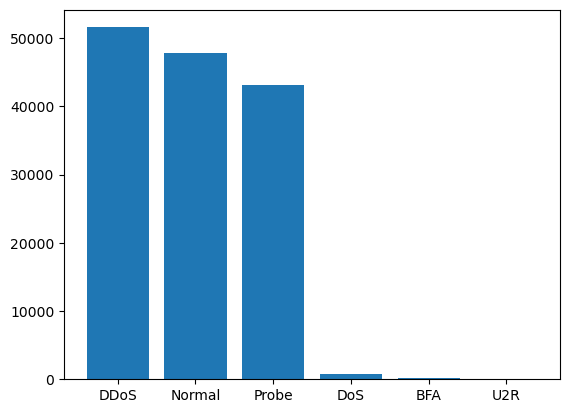

In [272]:
# Visualize the labels distribution
x,y=train_labels.value_counts().index,train_labels.value_counts().values
plt.bar(x,y)
plt.show()

In [273]:
#Feature correlation
correlation_matrix=train.corr(method="pearson")

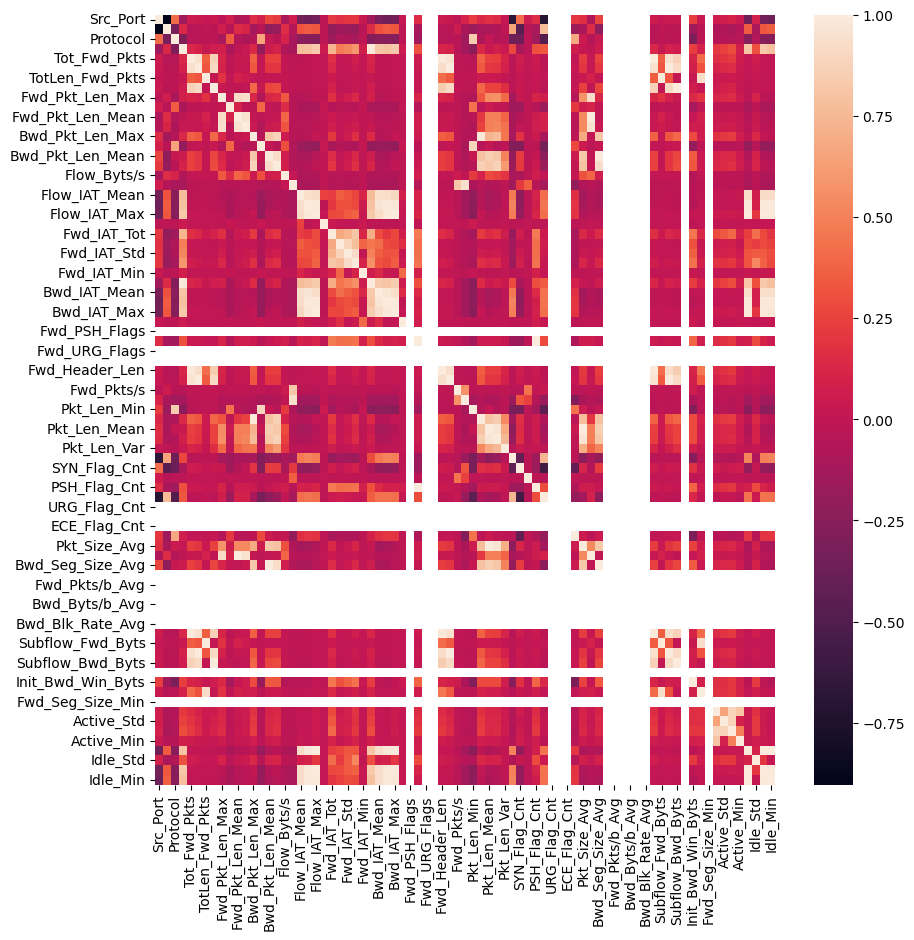

In [274]:
# correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,)
plt.show()

In [275]:
correlation_matrix

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Src_Port,1.000000,-0.903043,0.408463,-0.145166,0.050648,0.037758,0.012336,0.033849,-0.019634,0.068701,...,0.040198,NaN,0.071633,0.078141,0.093275,0.036443,-0.352647,0.092808,-0.338097,-0.363945
Dst_Port,-0.903043,1.000000,-0.329418,0.134572,-0.045298,-0.032592,-0.008437,-0.028542,0.074871,-0.035731,...,-0.033554,NaN,-0.083619,-0.072533,-0.094501,-0.055584,0.344679,-0.097464,0.329630,0.356215
Protocol,0.408463,-0.329418,1.000000,-0.280577,-0.041504,-0.027529,-0.011296,-0.019679,-0.097959,0.348420,...,-0.022101,NaN,-0.057003,-0.050935,-0.066101,-0.036679,-0.254699,-0.064129,-0.257548,-0.249559
Flow_Duration,-0.145166,0.134572,-0.280577,1.000000,0.123216,0.094294,0.030307,0.068715,0.085370,-0.106421,...,0.099596,NaN,0.204677,0.246933,0.288224,0.082243,0.806488,0.302594,0.826469,0.779474
Tot_Fwd_Pkts,0.050648,-0.045298,-0.041504,0.123216,1.000000,0.947951,0.358868,0.870280,0.110151,-0.015727,...,0.407826,NaN,0.154701,0.187264,0.212998,0.060601,0.008015,0.064981,0.015746,0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active_Min,0.036443,-0.055584,-0.036679,0.082243,0.060601,0.035655,0.027866,0.013415,0.053457,-0.013555,...,0.093326,NaN,0.805611,0.087307,0.488649,1.000000,0.028753,0.062372,0.034309,0.023404
Idle_Mean,-0.352647,0.344679,-0.254699,0.806488,0.008015,0.005343,-0.003421,-0.003929,-0.023331,-0.104198,...,0.013074,NaN,0.035745,0.024338,0.029184,0.028753,1.000000,0.107636,0.994924,0.995917
Idle_Std,0.092808,-0.097464,-0.064129,0.302594,0.064981,0.040385,0.012496,0.022177,0.102494,-0.023429,...,0.077410,NaN,0.170803,0.208193,0.207031,0.062372,0.107636,1.000000,0.202446,0.019905
Idle_Max,-0.338097,0.329630,-0.257548,0.826469,0.015746,0.010173,-0.001766,-0.001340,-0.011173,-0.105019,...,0.022541,NaN,0.054250,0.048263,0.053699,0.034309,0.994924,0.202446,1.000000,0.982397


### Data implications
Implied by our findings above we can say the following
1. **Missing values and Outliers:** There are no missing values in the trainset.But there are a few outliers.
2. **Data Imbalance:** The data set is strongly imbalanced with respect to instance lables.This implies that regular classification metrics like *accuracy* would not be good enough for evaluating final model.
3. **Scaling:** Depending on the final learning algorithm used,there might be need for feature scaling with a good number of the valiables in the data.This would discourage the model from assigning undue degrees of importance to a variable simply due to average magnitude.
4. **Correlation:** There is low multicolinearity within the data set.Some features exhibit strong correlations with one another.Some of these features might need to be eliminated or combined somehow to mentain feature independence.
5. **Data dimensionality:** There are around~ 84 different features in the dataset.Although the number of observations(~0.14 million)will offset the curse of dimensionality,the need to reduce the data dimensionality might arise.
6. **Large number of records:** The large number of records(~0.14 million)is characteristic of the amount of data generated from the day to day operations of the computer networks.As such,optimized algorithms would be required for effective computation.
7. **Irrelevant collumns:** Some columns are irrelevant since they have a variance of zero.These columns need to be eliminated.

### 03.Data Preparation

Based on the ***Data Implications*** discovered,the following steps will be experimented in the data preparation stage.
1. ***Remove invariant and irrelevant columns:*** The ivariant and irrelevant columns will be removed.
2. ***Feature scaling:*** Data will be scaled using the ***StandardScaler*** implementation provided by ***Sci-kit Learn***.
3. ***Feature Selection:*** The non-numeric features of the data set will be filtered out,and the numeric featres retained.This is done in order to avoid complicated feature engineering.
4. ***Distributed Computing:*** In order to satisfy the need for optimal computation,most of(if not all)algorithms used will be obtained from***PySpark***.

All these steps are implemented bellow:

In [279]:
# Import required utilities
!pip install pyspark
from pyspark.ml.feature import VectorAssembler,StringIndexer,IndexToString

In [280]:
invariant_features

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min']

In [281]:
#Drop invariant columns
train.drop(labels=invariant_features,axis=1,inplace=True)
test.drop(labels=invariant_features,axis=1,inplace=True)

In [282]:
train.shape

(93217, 65)

In [283]:
# Drop irrelevant features(Columns)
irrelevant_features=["Src_Port","Dst_Port"]
train.drop(labels=irrelevant_features,axis=1,inplace=True)
test.drop(labels=irrelevant_features,axis=1,inplace=True)


In [284]:
train.head(5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,6,268599,2,3,0,23,0,0,0.0,0.00000,...,64,0,0.0,0.0,0,0,0.0,0.0,0,0
1,6,22194,5,5,53,30,30,0,10.6,14.72413,...,215,2,0.0,0.0,0,0,0.0,0.0,0,0
2,6,8782,4,4,30,30,30,0,7.5,15.00000,...,215,1,0.0,0.0,0,0,0.0,0.0,0,0
3,6,4047,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0
4,6,3819,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0


In [285]:
# Eliminate Duplicated Labels
train_labels=train_labels.loc[train.index]
test_labels=test_labels.loc[test.index]


In [286]:
# combine targets and feature for pyspark
train["Labels"]=train_labels
test["Labels"]=test_labels


In [287]:
train.head(5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Labels
0,6,268599,2,3,0,23,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,6,22194,5,5,53,30,30,0,10.6,14.72413,...,2,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,6,8782,4,4,30,30,30,0,7.5,15.00000,...,1,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,6,4047,2,2,0,0,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,6,3819,2,2,0,0,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [288]:
# Eliminate the Outliers
outlier_detector=LocalOutlierFactor(novelty=True)
outlier_detector.fit(train.drop(labels="Labels",axis=1))

LocalOutlierFactor(novelty=True)

In [289]:
# Predict outliers in the datasets
train_outliers=outlier_detector.predict(train.drop(labels="Labels",axis=1).values)
test_outliers=outlier_detector.predict(test.drop(labels="Labels",axis=1).values)


C:\Users\ADMN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\ADMN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [290]:
# Number of outliers in datasets
print("Number of outliers in train data:",sum(train_outliers==-1))
print("Number of outliers in test data:",sum(test_outliers==-1))


Number of outliers in train data: 4957
Number of outliers in test data: 2457


In [291]:
# data shape
train.shape,test.shape

((93217, 64), (40402, 64))

In [292]:
# Eliminating Outliers
train=train.loc[train_outliers==1]
test=test.loc[test_outliers==1]


In [293]:

# data shape
train.shape,test.shape

((88260, 64), (37945, 64))

In [294]:
# Scale data Features
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [295]:
df=train.drop(labels="Labels",axis=1)
difference=df.max()-df.min()

In [296]:
difference

Protocol                  17.0
Flow_Duration      119999987.0
Tot_Fwd_Pkts            2800.0
Tot_Bwd_Pkts            8617.0
TotLen_Fwd_Pkts      6315520.0
                      ...     
Active_Min          25100000.0
Idle_Mean          119000000.0
Idle_Std            49600000.0
Idle_Max           119000000.0
Idle_Min           119000000.0
Length: 63, dtype: float64

In [297]:
# pick out categorical Features
categorical_columns=["Protocal"]
categorical_columns=[c for c in train.columns if "Flag" in c]

In [298]:
categorical_columns

['Bwd_PSH_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt']

In [299]:
# threshold
threshold=100
scale_columns=difference.loc[difference>=threshold].index.tolist()

In [300]:
scale_columns

['Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'Pkt_Size_Avg',
 'Fwd_Seg_Size_Avg',
 'Bwd_Seg_Size_Avg',
 'Subflow_Fwd_Pkts',
 'Subflow_Fwd_Byts',
 'Subflow_Bwd_Pkts',
 'Subflow_Bwd_Byts',
 'Init_Bwd_Win_Byts',
 'Fwd_Act_Data_Pkts',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 'Idle_Mean',
 'Idle_Std',
 'Idle_Max',
 'Idle_Min']

In [301]:
columns=difference.index.tolist()
int_scale_columns=[columns.index(c) for c in scale_columns if c not in categorical_columns]

In [302]:
reminder_columns =[c for c in range(len(columns)) if c not in int_scale_columns]

In [303]:
reminder_columns

[0, 30, 40, 41, 42, 43, 44, 45]

In [304]:
# implement custom scaling operation
def scale_data(train,test,columns_to_scale):
            x_train,y_train=train.drop(labels="Label",axis=1),train["Label"]
            x_test,y_test=test.drop(labels="Label",axis=1),test["Label"]    
            Transformer=ColumnTransformer(
                    Transformer=[
                        ("Scaler",StandardScaler(),columns_to_scale)
                    ],
                    remainder="passthrough"
                )
                #Train transformer
            transformer.fit(x_train)
                # Applytransformer on train and test datasets
            x_train=transformer.transform(x_train)
            x_test=transformer.transform(x_test)
               # get feature names
            columns=transformer.get_feature_names_out()
            return columns
                       
                       

In [ ]:
scale_data(train,test,int_scale_columns)

In [ ]:
# Instantiate spark session
import pip
! pip install pyspark
from pyspark.sql.session import SparkSession
spark=SparkSession.builder.master("local").appName("Network Intrusion").config("spark.some.config.option","some-value").getOrCreate()

In [ ]:
# Pandas  DF to  Spark DF
train=spark.CreateDataframe(train)
test=spark.CreateDataframe(test)


In [308]:
# Assemble features in vectors
assembler = VectorAssembler(inputCols= [c for c in train.columns if c !="Label"], outputCol = "features")
# Encode Labels
string_encoder=StringIndexer(inputCol="Label",outputCol="Int_Label")

AssertionError: 

In [314]:
string_encoder=string_encoder.fit(train)
train=string_encoder.transform(train)
test=string_encoder.transform(test)


NameError: name 'string_encoder' is not defined

In [318]:
train.show(2)

AttributeError: 'DataFrame' object has no attribute 'show'

In [320]:
train=assembler.transform(train)
test=assembler.transform(test)

NameError: name 'assembler' is not defined

### 4.Data Modelling
1. ***Logistic Regression***
2. ***Decision Tree***
3. ***OVR + Logistic Regression***

In [324]:
from pyspark.ml.classification import LogisticRegression,OneVsRest
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
# Instantiate models
dtc_model=DecisionTreeClassifier(inputCol="features",labelCol="Int_Label",outputCol="Prediction",maxDepth=10,impurity="entropy")
log_model=LogisticRegression(inputCol="features",labelCol="Int_Label",outputCol="prediction",maxIter=500
